# Problem statement.

Build a recommender system by using cosine simillarties score.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
book=pd.read_csv("D:/Datasets/Bookrecm.csv",encoding = "ISO-8859-1")
book = book.loc[:, ~book.columns.str.contains('^Unnamed')]
book.shape

(10000, 3)

In [10]:
book=book.rename(columns={'User.ID':'UserID','Book.Title':'BookTitle','Book.Rating':'BookRating'})

In [12]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
UserID        10000 non-null int64
BookTitle     10000 non-null object
BookRating    10000 non-null int64
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [13]:
book.isnull().sum()

UserID        0
BookTitle     0
BookRating    0
dtype: int64

In [14]:
book.nunique()

UserID        2182
BookTitle     9659
BookRating      10
dtype: int64

In [15]:
book['BookTitle'].value_counts()

Fahrenheit 451                                                5
Stardust                                                      4
The Amber Spyglass (His Dark Materials, Book 3)               4
Ender's Game (Ender Wiggins Saga (Paperback))                 4
Vanished                                                      4
                                                             ..
Changer                                                       1
The Book of Lights                                            1
The Four Agreements: A Practical Guide to Personal Freedom    1
Ediths Tagebuch.                                              1
Photoshop 3 for Macintosh (Visual Quickstart Guide)           1
Name: BookTitle, Length: 9659, dtype: int64

In [62]:
#Top20 highest number of time rated book
rating_count = book.groupby('BookTitle')['BookRating'].count().to_frame()
rating_count.rename(columns={'BookRating':'RatingCount'}, inplace=True)
data = book.merge(rating_count, on='BookTitle', how='inner')
m = rating_count.quantile(.9) # trim threshols number
q_books = data.copy().loc[data['RatingCount'] >= m[0]]
dataplot=q_books.sort_values(by="RatingCount",ascending=False)[0:20]

,UserID,BookTitle,BookRating,RatingCount
206,276875,Fahrenheit 451,2,5
207,278633,Fahrenheit 451,7,5
208,2442,Fahrenheit 451,10,5
209,4049,Fahrenheit 451,8,5
210,4207,Fahrenheit 451,8,5
4051,1348,Stardust,8,4
1047,278633,Ender's Game (Ender Wiggins Saga (Paperback)),5,4
1045,277527,Ender's Game (Ender Wiggins Saga (Paperback)),7,4
4052,1733,Stardust,8,4
4053,2576,Stardust,10,4


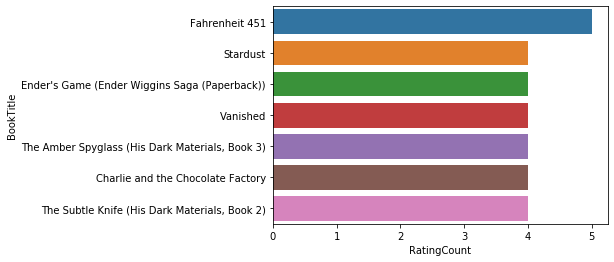

In [61]:
sns.barplot(y="BookTitle",x="RatingCount",data=dataplot)

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf= TfidfVectorizer(stop_words="english")


In [64]:
book["BookTitle"].isnull().sum()

0

In [106]:
book['BookTitle']=book['BookTitle'].str.lower()
book_1=book.drop_duplicates(subset='BookTitle',keep='first').reset_index(drop=True)
book_1

,UserID,BookTitle,BookRating
0,276726,classical mythology,5
1,276729,clara callan,3
2,276729,decision in normandy,6
3,276736,flu: the story of the great influenza pandemic...,8
4,276737,the mummies of urumchi,6
...,...,...,...
9633,162121,american fried: adventures of a happy eater.,7
9634,162121,cannibal in manhattan,9
9635,162121,how to flirt: a practical guide,7
9636,162121,twilight,8


In [107]:
book_1['BookTitle'].value_counts()

toilet learning : the picture book technique for children and parents                             1
diagnostic and statistical manual of mental disorders dsm-iv-tr (text revision)                   1
portfolios of ansel adams                                                                         1
wedding day murder: a lucy stone mystery (meier, leslie. lucy stone mystery.)                     1
the bible code                                                                                    1
                                                                                                 ..
ingathering: the complete people stories of zenna henderson                                       1
ozarks: the hills are alive with small towns and big hearts revealed in four complete romances    1
specter of the past (star wars: the hand of thrawn, book one)                                     1
los espejos venecianos                                                                            1


In [108]:
tfidf_matrix = tfidf.fit_transform(book_1.BookTitle)
tfidf_matrix.shape

(9638, 11435)

In [109]:
from sklearn.metrics.pairwise import linear_kernel

cos_sim_matrix= linear_kernel(tfidf_matrix,tfidf_matrix)


In [110]:
#Creating the mapping of Index to BooK Title
Bindex=pd.Series(book_1.index,index=book_1['BookTitle']).drop_duplicates()

In [116]:
def get_book_recommendation (Name,topN):
    Name=Name.lower()
    B_id=Bindex[Name]
    
    cosine_scores = list(enumerate(cos_sim_matrix[B_id]))
    
    cosine_scores = sorted(cosine_scores,key=lambda x:x[1],reverse = True)
     
    cosine_scores_10 = cosine_scores[0:topN+1]
    
    B_idx  =  [i[0] for i in cosine_scores_10]
    B_scores =  [i[1] for i in cosine_scores_10]
    
     
    B_similar_show = pd.DataFrame(columns=["name","Score"])
    B_similar_show["name"] = book_1.loc[B_idx,"BookTitle"]
    B_similar_show["name"]= B_similar_show["name"].str.upper()
    B_similar_show["Score"] = B_scores
    B_similar_show.reset_index(inplace=True)  
    B_similar_show.drop(["index"],axis=1,inplace=True)
    print (B_similar_show)

In [117]:
get_book_recommendation("PLEADING GUILTY",topN=15)

                                                 name     Score
0                                     PLEADING GUILTY  1.000000
1                                       GUILTY AS SIN  0.509092
2   GUILTY PLEASURES (ANITA BLAKE VAMPIRE HUNTER (...  0.287001
3                                 CLASSICAL MYTHOLOGY  0.000000
4                                        CLARA CALLAN  0.000000
5                                DECISION IN NORMANDY  0.000000
6   FLU: THE STORY OF THE GREAT INFLUENZA PANDEMIC...  0.000000
7                              THE MUMMIES OF URUMCHI  0.000000
8                              THE KITCHEN GOD'S WIFE  0.000000
9   WHAT IF?: THE WORLD'S FOREMOST MILITARY HISTOR...  0.000000
10  UNDER THE BLACK FLAG: THE ROMANCE AND THE REAL...  0.000000
11            WHERE YOU'LL FIND ME: AND OTHER STORIES  0.000000
12                        NIGHTS BELOW STATION STREET  0.000000
13  HITLER'S SECRET BANKERS: THE MYTH OF SWISS NEU...  0.000000
14                                 THE M